# Advanced AI - Statistics Module

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
!pip install pandas-datareader==0.10.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 13.6 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import yfinance as yf
import matplotlib
import matplotlib.pyplot as plt

# We download price data for Microsoft and the S&P500 index:
prices=yf.download(tickers="MSFT ^GSPC", start="2019-01-01",interval="1mo")
# We select Adjusted closing prices and drop any row with NA values:
adjprices = prices['Adj Close'].dropna()

[*********************100%***********************]  2 of 2 completed


<Figure size 432x288 with 0 Axes>

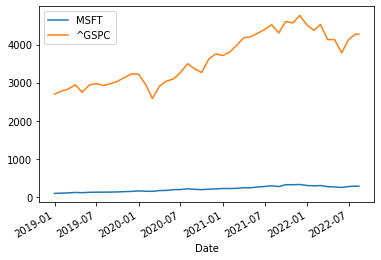

In [ ]:
plt.clf()
adjprices.plot(y=['MSFT','^GSPC'])
plt.show()

Challenge


In [ ]:
INTC = pdr.get_data_yahoo('INTC', start="01/01/2017", interval="m")
AMD = pdr.get_data_yahoo('AMD', start="01/01/2017", interval="m")

In [ ]:
INTC["r"] = np.log(INTC['Adj Close']) - np.log(INTC['Adj Close'].shift(1))

In [ ]:
AMD["r"] = np.log(AMD['Adj Close']) - np.log(AMD['Adj Close'].shift(1))

In [ ]:
INTC_r_mean=INTC["r"].mean()

In [ ]:
AMD_r_mean=AMD["r"].mean()

In [ ]:
INTC_r_var=INTC["r"].var()

In [ ]:
AMD_r_var=AMD["r"].var()

H0: mean(r_INTC) - mean(r_AMD) = 0

Ha: mean(r_INTC) - mean(r_AMD) <>0

In [ ]:
import math
t=((INTC_r_mean-AMD_r_mean-0))/math.sqrt((1/AMD["r"].count())*(AMD["r"].var()+INTC["r"].var()))


In [ ]:
t

-1.4629819794529495

Esto quiere decir que AMD tiene mayores retornos que Intel por 1.46 desviaciones estandar

# 3 Measures of linear relationship


In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import yfinance as yf
import matplotlib
import matplotlib.pyplot as plt

# We download price data for Microsoft and the S&P500 index:
prices=yf.download(tickers="MSFT ^GSPC", start="2019-01-01",interval="1mo")
# We select Adjusted closing prices and drop any row with NA values:
adjprices = prices['Adj Close'].dropna()

[*********************100%***********************]  2 of 2 completed


<Figure size 432x288 with 0 Axes>

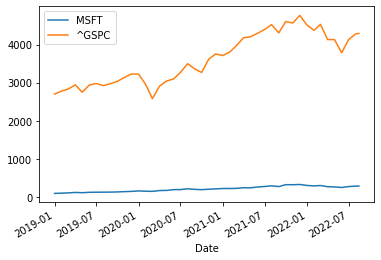

In [ ]:
plt.clf()
adjprices.plot(y=['MSFT','^GSPC'])
plt.show()

In [ ]:
adjprices['iMSFT'] = adjprices['MSFT'] / adjprices['MSFT'][0]
adjprices['iGSPC'] = adjprices['^GSPC'] / adjprices['^GSPC'][0]

<Figure size 432x288 with 0 Axes>

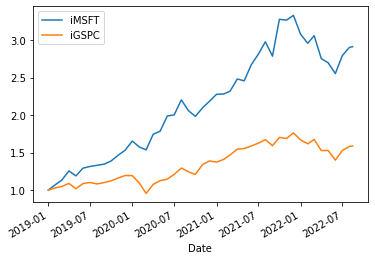

In [ ]:
plt.clf()
adjprices.plot(y=['iMSFT','iGSPC'])
plt.show()

In [ ]:
r = np.log(adjprices) - np.log(adjprices.shift(1))
# Dropping rows with NA values (the first month will have NAs)
r = r.dropna()
# Selecting only 2 columns (out of the 4 columns):
r = r[['MSFT','^GSPC']]
# Renameing the column names:
r.columns = ['MSFT','GSPC']

In [ ]:
r.head()

,MSFT,GSPC
Date,,
2019-02-01,0.070250,0.029296
2019-03-01,0.055671,0.017766
2019-04-01,0.101963,0.038560
2019-05-01,-0.054441,-0.068041
2019-06-01,0.083538,0.066658


<Figure size 432x288 with 0 Axes>

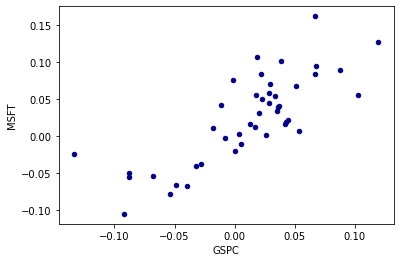

In [ ]:
plt.clf()
r.plot.scatter(x='GSPC', y='MSFT',c='DarkBlue')
plt.show()

<Figure size 432x288 with 0 Axes>

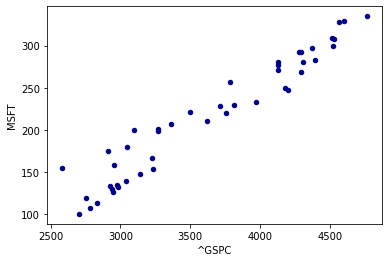

In [ ]:
plt.clf()
adjprices.plot.scatter(x='^GSPC', y='MSFT',c='DarkBlue')
plt.show()